In [1]:
import aifc
import numpy
import matplotlib.pyplot as plt

file = 'C:\\Users\\jorge\\DatasetsTFM\\KaggleData\\test\\'
audio_file = 'test{}.aiff'

file_number = 5
if file_number <= 5:
    file = file.format('no_')
else:
    file = file.format('') 
audio_file = 'test{}.aiff'.format(file_number)

f = aifc.open(file+audio_file, 'r')
nframes = f.getnframes()
strsig = f.readframes(nframes)
data = numpy.fromstring(strsig, numpy.short).byteswap()
# f.close()

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
nfft = 256  # Length of the windowing segments
fs = 2
plt.title('Frequency = %d' % fs)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft))
plt.axis('off')
plt.subplot(1,2,2)
nfft = 256
fs = 2000
plt.title('Frequency = %d' % fs)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft))
plt.axis('off')

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
nfft = 256  # Length of the windowing segments
fs = 2
plt.title('Window %d' % nfft)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft))
plt.axis('off')
plt.subplot(1,2,2)
nfft = 128
fs = 2
plt.title('Window %d' % nfft)
pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, window=numpy.blackman(nfft), noverlap=nfft/2)
plt.axis('off')

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(16.0, 1968.0, 0.0, 1.0)

In [ ]:
def get_any_spec(clip, spect_type):

In [2]:
def get_spec(plt , save_name):
    nfft = 256  # Length of the windowing segments
    fs = 2
    pxx, freqs, bins, im = plt.specgram(data, NFFT=nfft, Fs=fs, noverlap=128)
    plt.axis('off')
    plt.savefig(save_name,
                dpi=100,  # Dots per inch
                frameon='false',
                aspect='normal',
                bbox_inches='tight',
                pad_inches=0)  # Spectrogram saved as a .png


In [3]:
f.getnchannels(), f.getsampwidth(), f.getframerate(), f.getnframes(), f.getcomptype(), f.getmarkers()

(1, 2, 2000, 4000, b'NONE', None)

In [4]:
f.getparams()

_aifc_params(nchannels=1, sampwidth=2, framerate=2000, nframes=4000, comptype=b'NONE', compname=b'not compressed')

(128, 87)


(0.0, 11025.0)

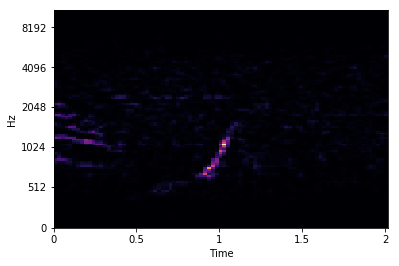

In [5]:
import librosa
import librosa.display

y, sr = librosa.load(file + audio_file, duration=196)
ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
# ps = librosa.core.stft(y=y)
print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.ylim()

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\librosa\display.py:665: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


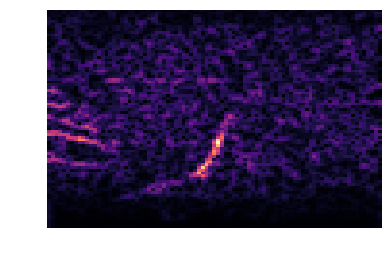

In [6]:
import librosa
import librosa.display

y, sr = librosa.load(file + audio_file, duration=2)
# ps = librosa.feature.melspectrogram(y=y, sr=sr, fmax = 1024)
ps = librosa.core.stft(y=y)
# print(ps.shape)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')
plt.axis('off')
a = plt.ylim(ymax = 256)

In [58]:
data

array([ 179, -429, -434, ..., -172, -145, -137], dtype=int16)

In [7]:
plt.show(librosa.feature.melspectrogram(y=y))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

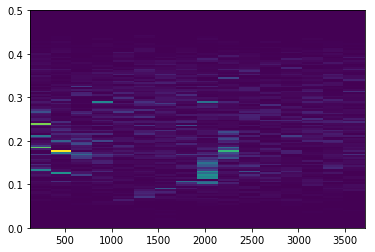

In [48]:
import scipy.signal as signal

f, t, sxx = signal.spectrogram(data)
aaa = plt.pcolormesh(t, f, sxx)

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


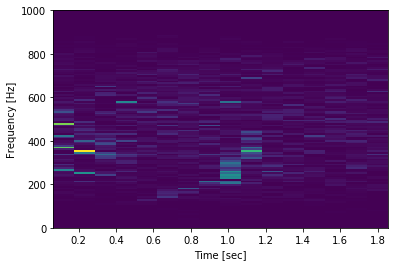

In [49]:
from scipy.io import wavfile
from scipy import signal
import numpy as np

# sample_rate, audio = wavfile.read(path_to_wav_file)

def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)
f = aifc.open(file+audio_file, 'r')
nframes = f.getnframes()
strsig = f.readframes(nframes)
data = numpy.fromstring(strsig, numpy.short).byteswap()
# f.close()
sample_freq, segment_time, spec_data = log_specgram(data, f.getframerate())
sample_freq, segment_time, spec_data = signal.spectrogram(data, f.getframerate())  
plt.pcolormesh(segment_time, sample_freq, spec_data )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()  

https://www.kaggle.com/timolee/audio-data-conversion-to-images-eda

(-0.5, 198.5, -0.5, 20.5)

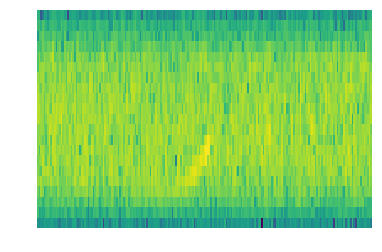

In [14]:
sample_freq, segment_time, spectrogram = log_specgram(data, f.getframerate())
plt.imshow(spectrogram.T, aspect='auto', origin='lower')
plt.axis('off')

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


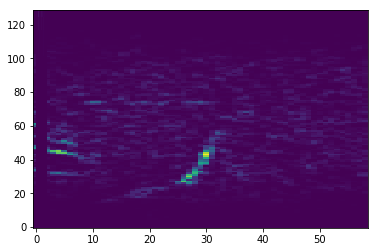

In [14]:
from matplotlib import mlab
import numpy as np

s = aifc.open(file+audio_file,'r')
nFrames = s.getnframes()
strSig = s.readframes(nFrames)
s = np.fromstring(strSig, np.short).byteswap()
params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
P, freqs, bins = mlab.specgram(s, **params)
plt.pcolormesh(bins, freqs, P)
plt.imshow(P, aspect='auto', origin='lower')

C:\Users\jorge\PycharmProjects\AudioExtraction\venv\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


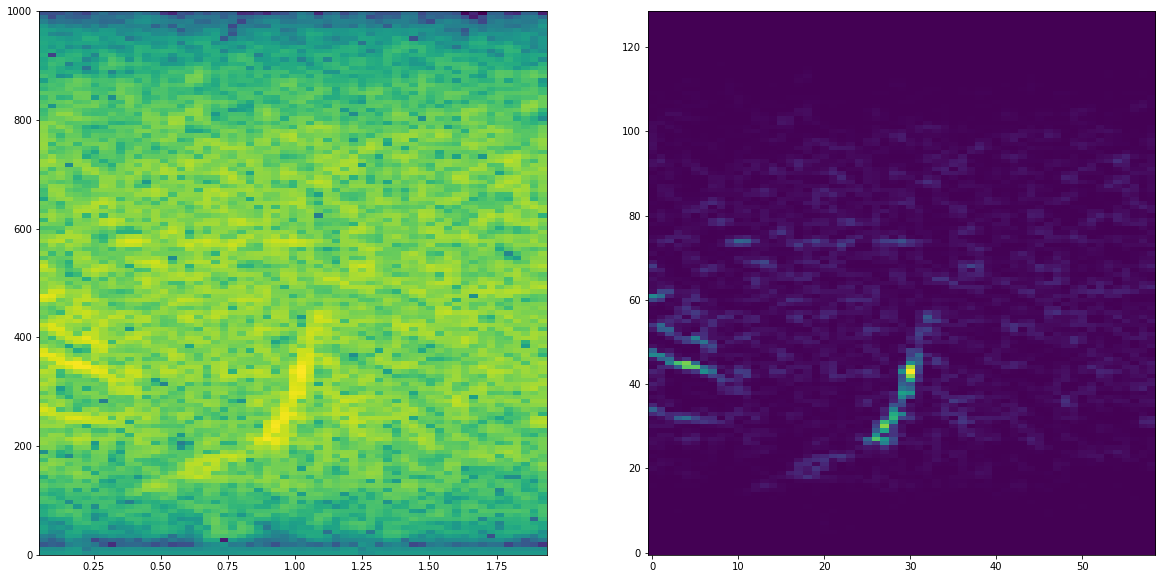

In [23]:
from matplotlib import mlab
import numpy as np

plt.figure(figsize=(20,10))
s = aifc.open(file+audio_file,'r')
nFrames = s.getnframes()
strSig = s.readframes(nFrames)
s = np.fromstring(strSig, np.short).byteswap()
params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
plt.subplot(1,2,1)
pxx, freqs, bins, im = plt.specgram(data, **params)
plt.subplot(1,2,2)
plt.imshow(pxx, aspect='auto', origin='lower')

In [4]:
import pandas as pd

df = pd.DataFrame({"cash": [1, 2, 3, 4,5], 
                   "game": ["ola", "ola", "cola", "cola", "ola"], 
                   "item_id": ["12", "12", "12", "65", "65"], 
                   "username": ["123", "654", "123", "654", "123"]})

In [5]:
df.groupby(["username", "game"]).sum()

cash
username game      
123      cola     3
         ola      6
654      cola     4
         ola      2

In [8]:
df[(df["cash"] > 2) & (df["cash"] < 5)]

,cash,game,item_id,username
2,3,cola,12,123
3,4,cola,65,654


In [21]:
a=-1
b = 25
def gen(a, b):
    for i in range(a//2, b//2):
        yield 2*i + 1
#     return (2*i + 1 for i in range(a//2, b//2)), 2
gen(a,b)

<generator object gen at 0x00000275599D3EB8>

In [ ]:
def credential(credential_int_list):
    N = len(credential_int_list)
    if N<=1000: # in case of we already have it
        return translate_credentials(credential_int_list)
    else:
        df = pd.DataFrame() # empty dataframe to store the dataframes
        for i in range(0, N, 1000): #separate in chunks of 1000
            df = df.append(translate_credentials(credential_int_list[i:i + 1000])) # join chunks one by one
        return df

In [27]:
a = [1, 2, 3 , 4, 5, 6,7, 3,3, 2]
for i in range(0, len(a), 3):
    print(a[i:i + 3])
a[2:25]

[1, 2, 3]
[4, 5, 6]
[7, 3, 3]
[2]


[3, 4, 5, 6, 7, 3, 3, 2]

In [43]:
from datetime import datetime as dt

l = [dt(2019,5,i) for i in range(1,23)]
list(filter(lambda dt: dt.day % 2 == 1, l))

[datetime.datetime(2019, 5, 1, 0, 0),
 datetime.datetime(2019, 5, 3, 0, 0),
 datetime.datetime(2019, 5, 5, 0, 0),
 datetime.datetime(2019, 5, 7, 0, 0),
 datetime.datetime(2019, 5, 9, 0, 0),
 datetime.datetime(2019, 5, 11, 0, 0),
 datetime.datetime(2019, 5, 13, 0, 0),
 datetime.datetime(2019, 5, 15, 0, 0),
 datetime.datetime(2019, 5, 17, 0, 0),
 datetime.datetime(2019, 5, 19, 0, 0),
 datetime.datetime(2019, 5, 21, 0, 0)]

In [44]:
path = "C:\\Users\\jorge\\Downloads\\exercise_data_visualization.txt"

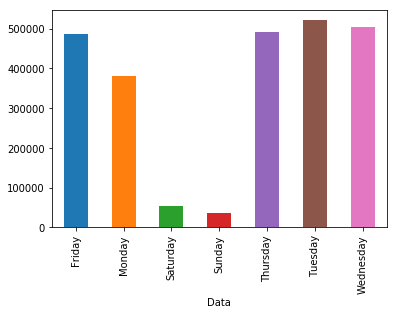

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

visites = pd.read_csv(path, sep=';', encoding='latin-1')
visites["Data"] = pd.to_datetime(visites["Data"], format='%Y%m%d')
visites = visites.dropna()
visites.groupby(visites["Data"].dt.strftime('%A'))["Total"].sum().plot.bar()

In [102]:
import urllib
import re

url = "http://nicolas-hug.com/blog/matrix_facto_1"

def get_images(url):
    with urllib.request.urlopen(url) as f:
        myfile = f.read()
        mystr = myfile.decode("utf8")
    return re.findall(r'(https?:\/\/.*\.(?:png|jpg|jpeg|gif|png|svg))', mystr)

get_images(uerl)
print(links_to_images(url))

['http://nicolas-hug.com/assets/images/favicon/apple-touch-icon-57x57.png',
 'http://nicolas-hug.com/assets/images/favicon/apple-touch-icon-114x114.png',
 'http://nicolas-hug.com/assets/images/favicon/apple-touch-icon-72x72.png',
 'http://nicolas-hug.com/assets/images/favicon/apple-touch-icon-144x144.png',
 'http://nicolas-hug.com/assets/images/favicon/apple-touch-icon-60x60.png',
 'http://nicolas-hug.com/assets/images/favicon/apple-touch-icon-120x120.png',
 'http://nicolas-hug.com/assets/images/favicon/apple-touch-icon-76x76.png',
 'http://nicolas-hug.com/assets/images/favicon/apple-touch-icon-152x152.png',
 'http://nicolas-hug.com/assets/images/favicon/favicon-196x196.png',
 'http://nicolas-hug.com/assets/images/favicon/favicon-96x96.png',
 'http://nicolas-hug.com/assets/images/favicon/favicon-32x32.png',
 'http://nicolas-hug.com/assets/images/favicon/favicon-16x16.png',
 'http://nicolas-hug.com/assets/images/favicon/favicon-128.png',
 'http://nicolas-hug.com/assets/mf_post/faces/fac

In [105]:
df[["cash", "game", "username"]]

,cash,game,username
0,1,ola,123
1,2,ola,654
2,3,cola,123
3,4,cola,654
4,5,ola,123
